# Plotting Multiple Data Series

Complete the following set of exercises to solidify your knowledge of plotting multiple data series with pandas, matplotlib, and seaborn. Part of the challenge that comes with plotting multiple data series is transforming the data into the form needed to visualize it like you want. For some of the exercises in this lab, you will need to transform the data into the form most appropriate for generating the visualization and then create the plot.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data = pd.read_csv('../data/liquor_store_sales.csv')
data.head()

,Year,Month,Supplier,ItemCode,Description,ItemType,RetailSales,RetailTransfers,WarehouseSales
0,2017,4,ROYAL WINE CORP,100200,GAMLA CAB - 750ML,WINE,0.0,1.0,0.0
1,2017,4,SANTA MARGHERITA USA INC,100749,SANTA MARGHERITA P/GRIG ALTO - 375ML,WINE,0.0,1.0,0.0
2,2017,4,JIM BEAM BRANDS CO,10103,KNOB CREEK BOURBON 9YR - 100P - 375ML,LIQUOR,0.0,8.0,0.0
3,2017,4,HEAVEN HILL DISTILLERIES INC,10120,J W DANT BOURBON 100P - 1.75L,LIQUOR,0.0,2.0,0.0
4,2017,4,ROYAL WINE CORP,101664,RAMON CORDOVA RIOJA - 750ML,WINE,0.0,4.0,0.0


## 1. Create a bar chart with bars for total Retail Sales, Retail Transfers, and Warehouse Sales by Item Type.

In [3]:
%%time
# data.groupby('ItemType')[['RetailSales', 'RetailTransfers', 'WarehouseSales']].plot.bar()
# data.groupby('ItemType').plot.bar()
# data.select_dtypes(include = 'number')[:100].plot.bar()

# data.groupby('ItemType').plot.bar(
#     x = ['RetailSales', 'RetailTransfers', 'WarehouseSales'],
# )

# data.groupby('ItemType').plot.bar(
#     x = 'RetailSales'
# )

# data.pivot_table(
#     index = 'ItemType',
#     values = ['RetailSales', 'RetailTransfers', 'WarehouseSales'],
#     aggfunc = 'sum'
# ).reset_index().plot.bar()

# sales_data = data.pivot_table(
#     index = 'ItemType',
#     values = ['RetailSales', 'RetailTransfers', 'WarehouseSales'],
#     aggfunc = 'sum'
# ).reset_index()

CPU times: user 17.1 ms, sys: 2.38 ms, total: 19.5 ms
Wall time: 18.5 ms


In [5]:
data.pivot_table(
    index = 'ItemType',
    values = ['RetailSales', 'RetailTransfers', 'WarehouseSales'],
    aggfunc = 'sum'
).reset_index()

,ItemType,RetailSales,RetailTransfers,WarehouseSales
0,BEER,209763.11,234924.44,2437617.32
1,DUNNAGE,0.00,0.00,-45331.00
2,KEGS,0.00,0.00,43558.00
3,LIQUOR,309847.85,334176.41,33173.32
4,NON-ALCOHOL,8109.97,9058.37,8656.72
5,REF,281.34,171.92,-6754.00
6,STR_SUPPLIES,995.98,3594.70,0.00
7,WINE,313400.42,340710.51,433009.47


In [7]:
salesdf = data.pivot_table(
    index = 'ItemType',
    values = ['RetailSales', 'RetailTransfers', 'WarehouseSales'],
    aggfunc = 'sum'
).reset_index()

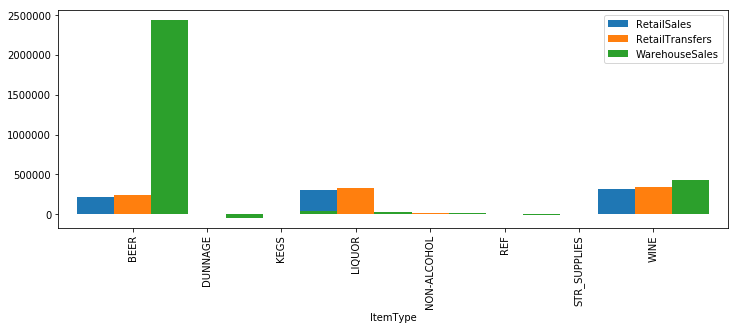

In [12]:
salesdf.plot.bar(
    x  = 'ItemType',
    width = 1.5,
    figsize = (12,4)
)

## 2. Create a horizontal bar chart showing sales mix for the top 10 suppliers with the most total sales. 

In [ ]:
# barh
# groupby Suppliers, aggregate(sum) the sales columns, find the top 10, and display their total Retail Sales, Retail Transfers, and Warehouse Sales

In [22]:
data['Total Sales'] = data[['RetailSales', 'RetailTransfers', 'WarehouseSales']].sum(axis = 1)
data.head()

,Year,Month,Supplier,ItemCode,Description,ItemType,RetailSales,RetailTransfers,WarehouseSales,Total Sales
0,2017,4,ROYAL WINE CORP,100200,GAMLA CAB - 750ML,WINE,0.0,1.0,0.0,1.0
1,2017,4,SANTA MARGHERITA USA INC,100749,SANTA MARGHERITA P/GRIG ALTO - 375ML,WINE,0.0,1.0,0.0,1.0
2,2017,4,JIM BEAM BRANDS CO,10103,KNOB CREEK BOURBON 9YR - 100P - 375ML,LIQUOR,0.0,8.0,0.0,8.0
3,2017,4,HEAVEN HILL DISTILLERIES INC,10120,J W DANT BOURBON 100P - 1.75L,LIQUOR,0.0,2.0,0.0,2.0
4,2017,4,ROYAL WINE CORP,101664,RAMON CORDOVA RIOJA - 750ML,WINE,0.0,4.0,0.0,4.0


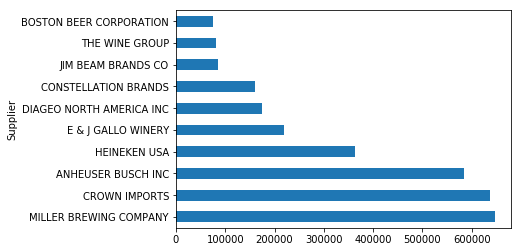

In [40]:
# data.groupby('Supplier').sum().sort_values(by = 'Total Sales', ascending = False)[:10].plot.barh()


data.groupby('Supplier')['Total Sales'].sum().sort_values(ascending = False)[:10].plot.barh()



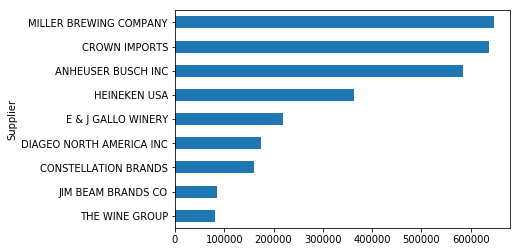

In [42]:
# have to adjust the data, before you give it to the Plot.
data.groupby('Supplier')['Total Sales'].sum().sort_values(ascending = True)[-9:].plot.barh()

## 3. Create a multi-line chart that shows average Retail Sales, Retail Transfers, and Warehouse Sales per month over time.

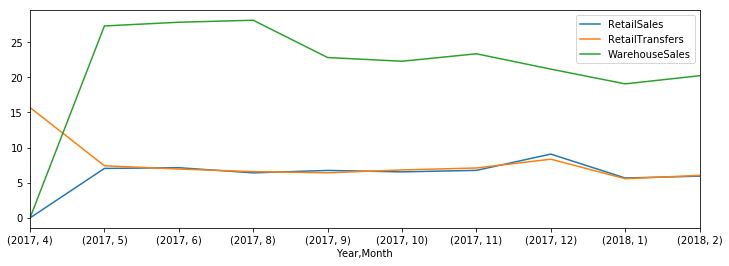

In [50]:
# group by month, and plot 3 line plots, one each for RetailSales, RetailTransfers, WarehouseSales

# months repeat each year, so give the months unique values by first indexing/grouping by Year
data.pivot_table(
    index = ['Year', 'Month'],
    values = ['RetailSales', 'RetailTransfers', 'WarehouseSales'],
).plot(figsize = (12, 4))

## 4. Plot the same information as above but as a bar chart.

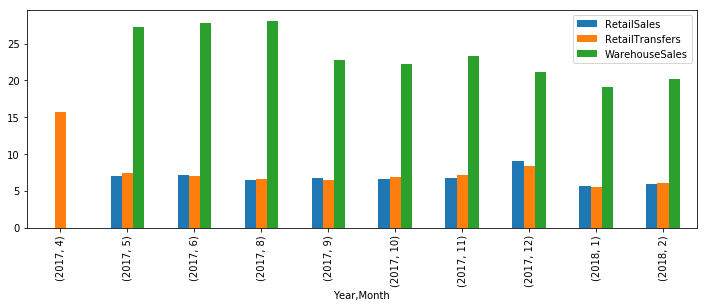

In [51]:
# group by month, and plot 3 line plots, one each for RetailSales, RetailTransfers, WarehouseSales as a bar chart
data.pivot_table(
    index = ['Year', 'Month'],
    values = ['RetailSales', 'RetailTransfers', 'WarehouseSales'],
).plot.bar(figsize = (12, 4))

## 5. Create a multi-line chart that shows Retail Sales summed by Item Type over time (Year & Month).

*Hint: There should be a line representing each Item Type.*

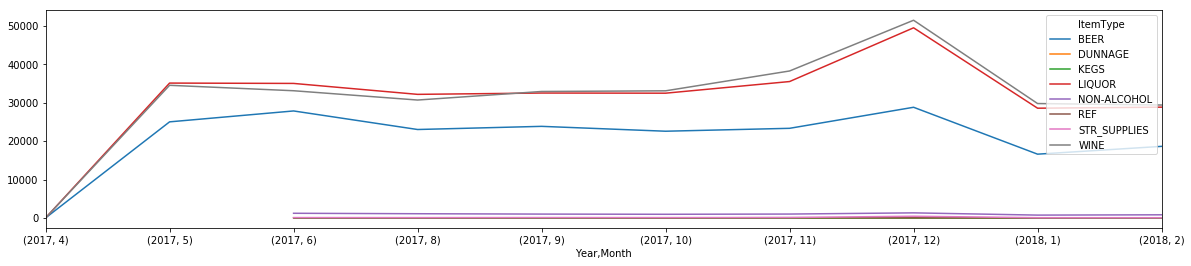

In [65]:
data.pivot_table(
    index = ['Year', 'Month'],
#     columns = data.ItemType.unique(),
    columns = 'ItemType',
    values = 'RetailSales',
    aggfunc = 'sum'
).plot(figsize = (20, 4))

## 6. Plot the same information as above but as a bar chart.

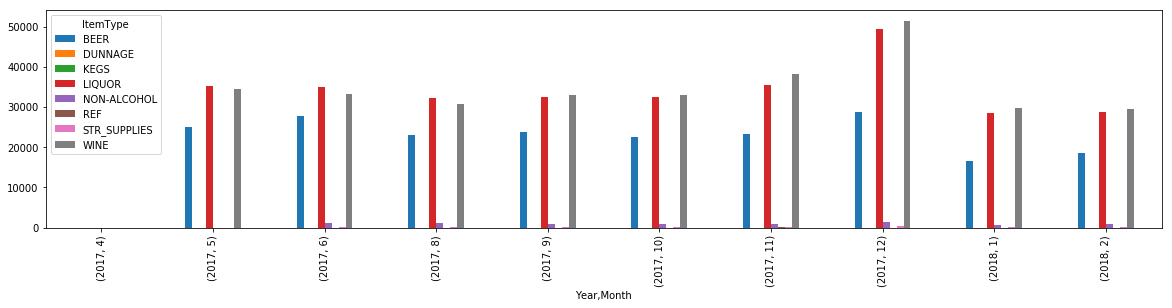

In [66]:
data.pivot_table(
    index = ['Year', 'Month'],
#     columns = data.ItemType.unique(),
    columns = 'ItemType',
    values = 'RetailSales',
    aggfunc = 'sum'
).plot.bar(figsize = (20, 4))

## 7. Create a scatter plot showing the relationship between Retail Sales (x-axis) and Retail Transfers (y-axis) with the plot points color-coded according to their Item Type.

*Hint: Seaborn's lmplot is the easiest way to generate the scatter plot.*

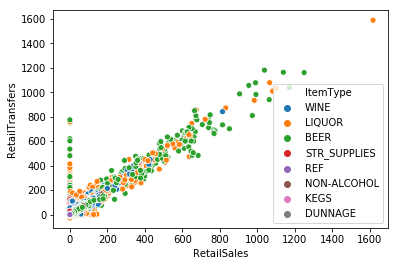

In [71]:
sns.scatterplot(
    x = 'RetailSales', # xvalues
    y = 'RetailTransfers', # yvalues
    hue = 'ItemType', # color by ItemType
    data = data, # data
)

## 8. Create a scatter matrix using all the numeric fields in the data set with the plot points color-coded by Item Type.

*Hint: Seaborn's pairplot may be your best option here.*

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2662e8d0>,
      dtype=object)

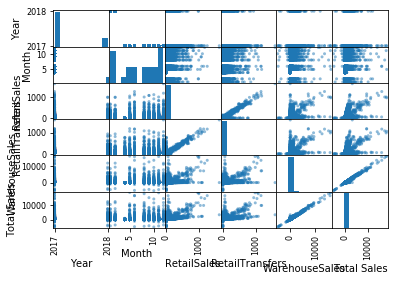

In [72]:
pd.plotting.scatter_matrix(data) # for quick reference, not my answer to #8

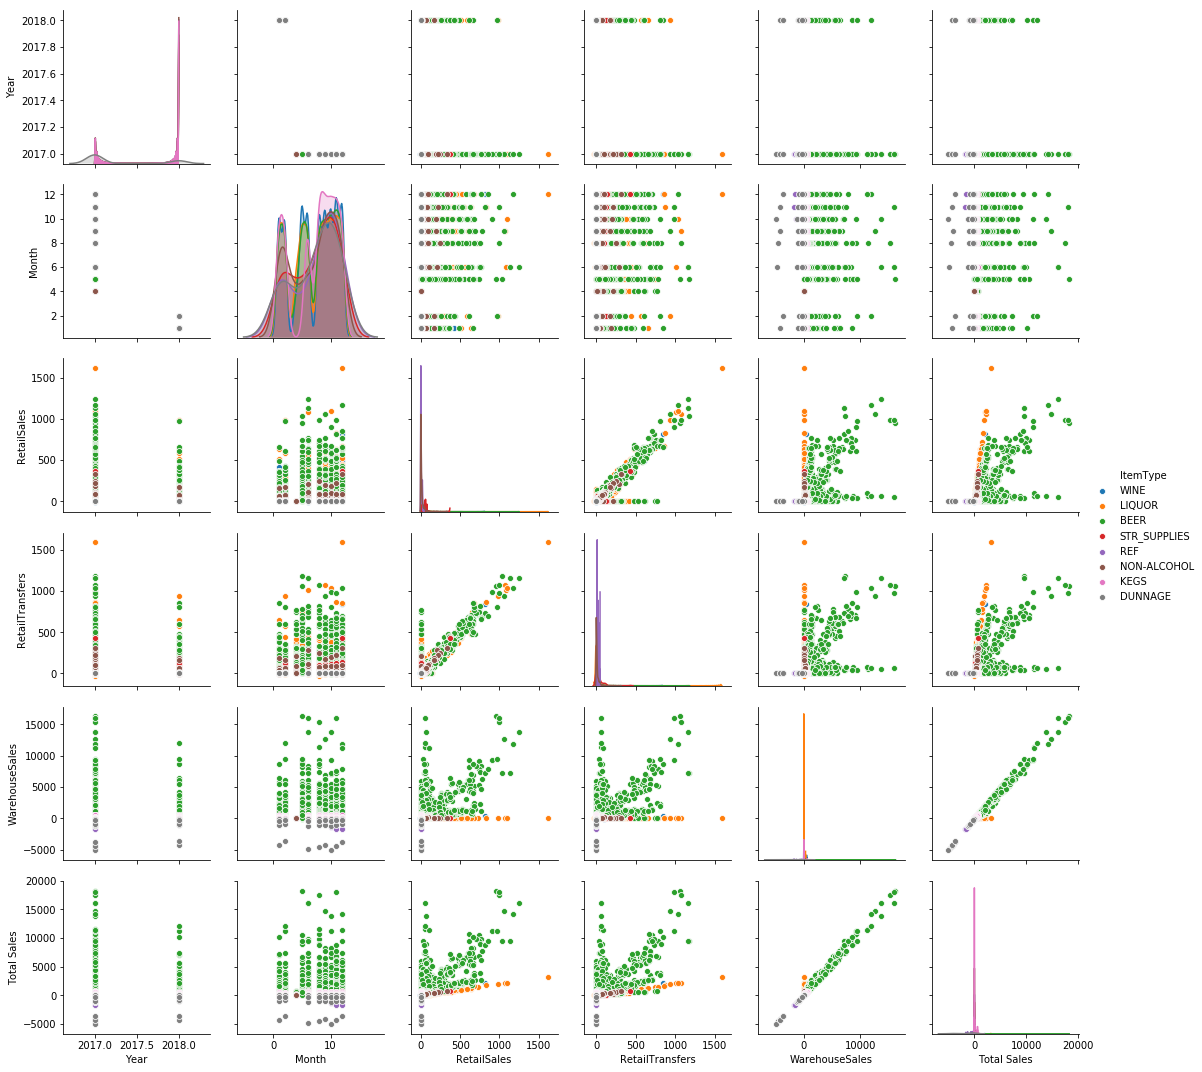

In [75]:
# sns.pairplot(data = data.select_dtypes(include = 'number'), hue = 'ItemType') # can't do this one, because if i pull only the numeric columns ahead of time, then 'ItemType' doesn't exist and the function doesn't know where to find it

sns.pairplot(data = data, hue = 'ItemType')

Notes after the fact:
There are negative Values in some of the Sales columns.
Not really any such thing as a Negative Sale, right? 
You could have negative Profit, or a net negative after purchases? 
Depending on the question the Business was asking, might have dropped those rows.